In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [ ]:
df.shape


(14640, 15)

In [ ]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [ ]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [ ]:
df["text"].nunique()

14427

In [ ]:
## with text.....

# 1. find out all the strings/special characters and clean them . It involves cleaning of #,@... emoticons,email adress,weblinks...et
# 2.remove the stopwords
# 3. Data visulaization - word cloud,frequency plots
# 4. Above step depends on the tokenization of the data
# 5. stemming/lemmatization followed by NER NER Tags and POS Tags...()
# 6. Ngrams - it refers to words taken together for eg 1 gram means 1 word together
# 7.convert the text into numers - bag of words, count vectorizer,tfidf
# 8. build the sentiment analysis model

In [ ]:
# target and text

df_airline=df[["airline_sentiment","text"]]
df_airline.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: xlabel='airline_sentiment'>

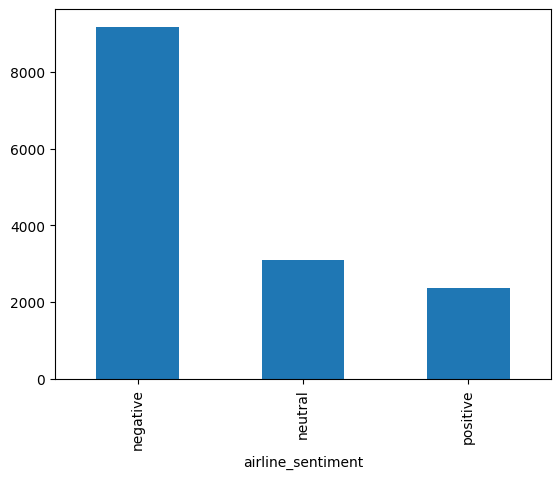

In [ ]:
df_airline["airline_sentiment"].value_counts().plot(kind="bar")

In [ ]:
def sentiment(x):
  if x=="negative":
    return -1
  elif x=="neutral":
    return 0
  else:
    return 1

In [ ]:
df_airline["Target"]=df_airline["airline_sentiment"].apply(sentiment)

<ipython-input-12-1bd0da6be5ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airline["Target"]=df_airline["airline_sentiment"].apply(sentiment)


In [ ]:
df_airline["Target"].value_counts()

,count
Target,
-1,9178
0,3099
1,2363


In [ ]:
df_airline["text"].head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [ ]:
## special characters this text has....
mytext=pd.DataFrame(df["text"])
mytext.head()

,text
0,@VirginAmerica What @dhepburn said.
1,@VirginAmerica plus you've added commercials t...
2,@VirginAmerica I didn't today... Must mean I n...
3,@VirginAmerica it's really aggressive to blast...
4,@VirginAmerica and it's a really big bad thing...


In [ ]:
import re

def special_chrs(text):
  characters=re.findall("[^A-Za-z0-9\s]",text)
  return characters
mytext["characters"]=mytext["text"].apply(special_chrs)

In [ ]:
mytext.head()

,text,characters
0,@VirginAmerica What @dhepburn said.,"[@, @, .]"
1,@VirginAmerica plus you've added commercials t...,"[@, ', ., ., ., .]"
2,@VirginAmerica I didn't today... Must mean I n...,"[@, ', ., ., ., !]"
3,@VirginAmerica it's really aggressive to blast...,"[@, ', "", "", ', &, ;]"
4,@VirginAmerica and it's a really big bad thing...,"[@, ']"


In [ ]:
noise=set(i for sublist in mytext["characters"] for i in sublist)
# sort the noise
noise_sorted=sorted(list(noise))
print(noise_sorted)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '=', '?', '@', '[', ']', '^', '_', '{', '|', '}', '~', '£', '°', 'º', 'É', 'á', 'â', 'ã', 'é', 'ê', 'í', 'ʖ', '͜', '͡', '\u200b', '–', '—', '‘', '’', '“', '”', '…', '€', '↔', '⌚', '☀', '☕', '☺', '♥', '⛄', '✅', '✈', '✌', '✔', '✨', '❄', '❌', '❗', '❤', '➡', '⤴', '⤵', '⭐', '️', '🆖', '🆘', '🇧', '🇬', '🇸', '🇺', '🌏', '🌞', '🌟', '🌴', '🍅', '🍷', '🍸', '🍻', '🎀', '🎉', '🎲', '🎵', '🐩', '🐳', '🐴', '👀', '👉', '👊', '👋', '👌', '👍', '👎', '👏', '👠', '👸', '👺', '👿', '💁', '💔', '💕', '💖', '💗', '💘', '💙', '💜', '💝', '💤', '💩', '💪', '💯', '💺', '📱', '📲', '🔵', '😀', '😁', '😂', '😃', '😄', '😅', '😆', '😈', '😉', '😊', '😋', '😍', '😎', '😏', '😐', '😑', '😒', '😓', '😔', '😕', '😖', '😘', '😜', '😞', '😠', '😡', '😢', '😣', '😤', '😥', '😦', '😩', '😪', '😫', '😬', '😭', '😮', '😱', '😲', '😳', '😵', '😷', '😻', '🙅', '🙈', '🙉', '🙌', '🙏', '🚪', '🚫', '🚶']


In [ ]:
def clean_text(text):
  # remove the @ mentions
  text=re.sub("@\w+","",text) # alternate of "@\w+" is @[a-zA-Z]+
  # remove the special characters
  text=re.sub("[^A-Za-z0-9\s]","",text)
  text=text.strip()
  return text

In [ ]:
mytext["cleansed"]=mytext.text.apply(clean_text)

In [ ]:
# prompt: i need to see full text

import pandas as pd
pd.set_option('display.max_colwidth', None)
print(mytext["cleansed"])


0                                                                                                                                    What  said
1                                                                                          plus youve added commercials to the experience tacky
2                                                                                           I didnt today Must mean I need to take another trip
3                                     its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4                                                                                                       and its a really big bad thing about it
                                                                          ...                                                                  
14635                                                                                         thank you we got on a different flight to 

In [ ]:
df_airline["clean_text"]=df_airline["text"].apply(clean_text)

<ipython-input-32-ae9466b9e0ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airline["clean_text"]=df_airline["text"].apply(clean_text)


In [ ]:
df_airline.head()

,airline_sentiment,text,Target,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,0,What said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,1,plus youve added commercials to the experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,0,I didnt today Must mean I need to take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",-1,its really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,-1,and its a really big bad thing about it


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords

stop=stopwords.words("english")
print(stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text):
  word=text.lower()
  word=word.split()
  words=[char for char in word if char not in stop]
  return " ".join(words)
df_airline['clean_text']=df_airline['clean_text'].apply(remove_stopwords)

<ipython-input-39-d8bd1511fcae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airline['clean_text']=df_airline['clean_text'].apply(remove_stopwords)


In [ ]:
df_airline.head()

,airline_sentiment,text,Target,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,0,said
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.,1,plus youve added commercials experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!,0,didnt today must mean need take another trip
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",-1,really aggressive blast obnoxious entertainment guests faces amp little recourse
4,negative,@VirginAmerica and it's a really big bad thing about it,-1,really big bad thing


In [ ]:
# Data Visualization

In [ ]:
# break the sentences in th datframe into tokens

from nltk.tokenize import word_tokenize

df_airline["tokens"]=df_airline["clean_text"].apply(word_tokenize)


<ipython-input-59-05c983764147>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airline["tokens"]=df_airline["clean_text"].apply(word_tokenize)


In [ ]:
all_tokens=[]
for i in df_airline["clean_text"]:
  if len(i.split())>1:
    for j in i.split():
      all_tokens.append(j)
  else:
    all_tokens.append(i)


In [ ]:
print(len(all_tokens))

136829


In [ ]:
from nltk.probability import FreqDist
freq=pd.DataFrame(FreqDist(all_tokens).items(),columns=["Tokens","Frequency"]).sort_values(by="Frequency",ascending=False)

In [ ]:
all_tokens=[tokens for text in df_airline["clean_text"] for tokens in word_tokenize(text)]

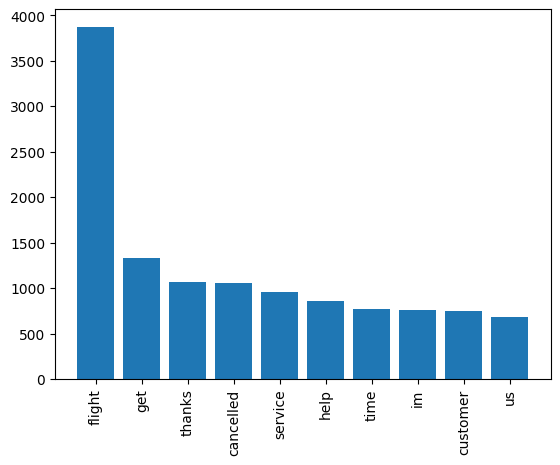

In [ ]:
plt.bar(freq.Tokens[0:10],freq.Frequency[0:10])
plt.xticks(rotation=90)
plt.show()

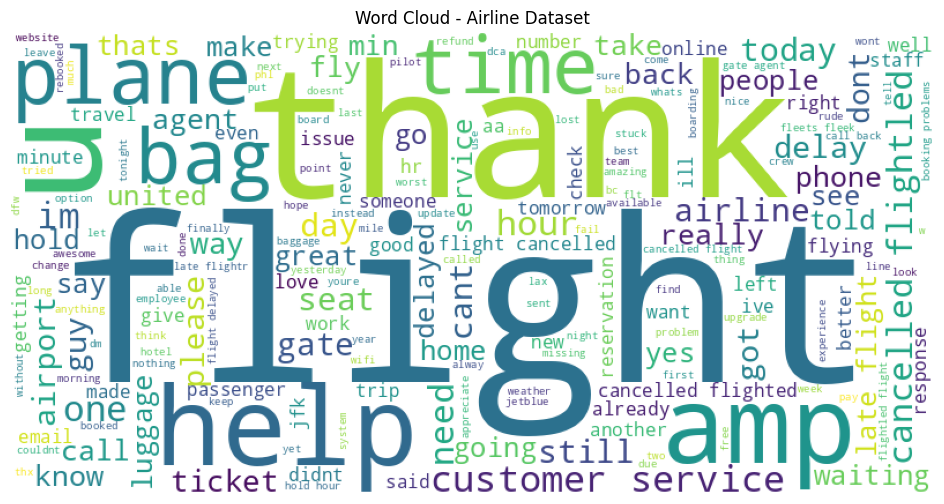

In [ ]:
# Generate word cloud using all_tokens
wordcloud = WordCloud(width = 800, height = 400,
                      background_color = "white").generate(" ".join(all_tokens))

plt.figure(figsize = (12, 6))
plt.imshow(wordcloud)
plt.title("Word Cloud - Airline Dataset")
plt.axis("off")
plt.show()

In [ ]:
#Model Building
# bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df_airline.clean_text).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df_airline.Target
y.shape

(14640,)

In [ ]:
X.shape

(14640, 15694)

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))# recall for my negative is 89 percent

              precision    recall  f1-score   support

          -1       0.85      0.89      0.87      1835
           0       0.62      0.62      0.62       620
           1       0.78      0.63      0.70       473

    accuracy                           0.79      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.79      0.79      2928



In [ ]:
df_airline.clean_text

,clean_text
0,said
1,plus youve added commercials experience tacky
2,didnt today must mean need take another trip
3,really aggressive blast obnoxious entertainment guests faces amp little recourse
4,really big bad thing
...,...
14635,thank got different flight chicago
14636,leaving 20 minutes late flight warnings communication 15 minutes late flight thats called shitty customer svc
14637,please bring american airlines blackberry10
14638,money change flight dont answer phones suggestions make commitment


In [ ]:
# tfidf

from sklearn.feature_extraction.text import TfidfVectorizer
TF=TfidfVectorizer()
X=TF.fit_transform(df_airline.clean_text)
X

<14640x15694 sparse matrix of type '<class 'numpy.float64'>'
	with 130972 stored elements in Compressed Sparse Row format>

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
from sklearn.metrics import classification_report
y_pred=lr.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.78      0.95      0.86      1835
           0       0.67      0.44      0.53       620
           1       0.85      0.53      0.65       473

    accuracy                           0.77      2928
   macro avg       0.77      0.64      0.68      2928
weighted avg       0.77      0.77      0.76      2928



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred=gb.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.71      0.97      0.82      1835
           0       0.73      0.12      0.21       620
           1       0.75      0.54      0.63       473

    accuracy                           0.72      2928
   macro avg       0.73      0.54      0.55      2928
weighted avg       0.72      0.72      0.66      2928



In [ ]:
df.text[3]

'@virginamerica really aggressive blast obnoxious "entertainment" guests\' faces &amp; little recourse'